# Project: Investigate a Dataset - FBI Gun Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
The data set that is being reviewed is the FBI Gun Data collected from two files: gun_data.xlsx and US_Census_Data.csv. The file **gun_data.xlsx** is from the NICS database supplied by the FBI and the **US_Census_Data.csv** file is provided from census.gov.

The **gun_data.xlsx** has the following column names that contain the number of firearm checks by month, state, and type:
- month	
- state	
- permit	
- permit_recheck	
- handgun	long_gun	
- other	
- multiple	
- admin	
- prepawn_handgun	
- prepawn_long_gun	
- prepawn_other	
- redemption_handgun	
- redemption_long_gun	
- redemption_other	
- returned_handgun	
- returned_long_gun	
- returned_other	
- rentals_handgun	
- rentals_long_gun	
- private_sale_handgun	
- private_sale_long_gun	
- private_sale_other	
- return_to_seller_handgun	
- return_to_seller_long_gun	
- return_to_seller_other	
- totals


The **US_Census_Data.csv** has the following column names containing several variables at the state level:
- Fact	
- Fact Note	
- Alabama	
- Alaska	
- Arizona	
- Arkansas	
- California	
- Colorado	
- Connecticut	
- Delaware	
- Florida	
- Georgia	
- Hawaii	
- Idaho	
- Illinois	
- Indiana	
- Iowa	
- Kansas	
- Kentucky	
- Louisiana	
- Maine	
- Maryland	
- Massachusetts	
- Michigan	
- Minnesota	
- Mississippi	
- Missouri	
- Montana	
- Nebraska	
- Nevada	
- New Hampshire	
- New Jersey	
- New Mexico	
- New York	
- North Carolina	
- North Dakota	
- Ohio	
- Oklahoma	
- Oregon	
- Pennsylvania	
- Rhode Island	
- South Carolina	
- South Dakota	
- Tennessee	
- Texas	
- Utah	
- Vermont	
- Virginia	
- Washington	
- West Virginia	
- Wisconsin	
- Wyoming


### Question(s) for Analysis
The questions I will be posing for analysis would be the following:
 - Is there a potential relationship between race and the frequency of gun purchase checks?
 - Is there a seasonal trend in gun purchase checks across different states?

In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
# !pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling

In [3]:
#loading the data file gun_data.xlsx
gun_data_file_path = 'Database_Ncis_and_Census_data/gun_data.xlsx'

#loading the data file 
df_guns_raw = pd.read_excel(gun_data_file_path)

#printing a few lines to test that the files loaded correctly
df_guns_raw.head()
#----------------------

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [4]:
#establishing the file path for the data file
census_data_file_path = 'Database_Ncis_and_Census_data/US_Census_Data.csv'

#loading the data file 
df_census_raw = pd.read_csv(census_data_file_path)

#printing a few lines to test that the files loaded correctly
df_census_raw.head()
#---------------------------------------------------------------------

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


### Duplicates Investigation
The following code will perfom the investigation on if there are any duplicate records in the data files.

In [5]:
#checking for duplicate records in the data of df_guns_raw
duplicate_count = df_guns_raw.duplicated().sum()
print(f"Number of duplicate rows df_guns_raw: {duplicate_count}")

#checking for duplicate records in the data
duplicate_count = df_census_raw.duplicated().sum()
print(f"Number of duplicate rows in df_census_raw: {duplicate_count}")
#---------------------------------------------------------------------

Number of duplicate rows df_guns_raw: 0
Number of duplicate rows in df_census_raw: 3


### File Information Investigation
Investigating the files to see where areas may need to be cleaned up. After cleaning the files, another information investigation will occur to ensure this was performed correctly.

In [6]:
#checking file information in the data of df_guns_raw
df_guns_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
month                        12485 non-null object
state                        12485 non-null object
permit                       12461 non-null float64
permit_recheck               1100 non-null float64
handgun                      12465 non-null float64
long_gun                     12466 non-null float64
other                        5500 non-null float64
multiple                     12485 non-null int64
admin                        12462 non-null float64
prepawn_handgun              10542 non-null float64
prepawn_long_gun             10540 non-null float64
prepawn_other                5115 non-null float64
redemption_handgun           10545 non-null float64
redemption_long_gun          10544 non-null float64
redemption_other             5115 non-null float64
returned_handgun             2200 non-null float64
returned_long_gun            2145 non-null float64
returned_other   

In [7]:
#checking file information in the data df_census_raw
df_census_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
Fact              80 non-null object
Fact Note         28 non-null object
Alabama           65 non-null object
Alaska            65 non-null object
Arizona           65 non-null object
Arkansas          65 non-null object
California        65 non-null object
Colorado          65 non-null object
Connecticut       65 non-null object
Delaware          65 non-null object
Florida           65 non-null object
Georgia           65 non-null object
Hawaii            65 non-null object
Idaho             65 non-null object
Illinois          65 non-null object
Indiana           65 non-null object
Iowa              65 non-null object
Kansas            65 non-null object
Kentucky          65 non-null object
Louisiana         65 non-null object
Maine             65 non-null object
Maryland          65 non-null object
Massachusetts     65 non-null object
Michigan          65 non-null object
Minnesota

### Data Cleaning

### Data Cleaning df_guns_raw
>The data file df_guns_raw will now be cleaned up. Removal of unnecessary columns and rows will occur. Rows containing entities that do not belong to the list of 50 states of the United States will be removed to help focus on a state-by-state comparison due to limitations of the US Census Data.

In [8]:
### DATA CLEANING - df_guns_raw
#step 1: removing unecessary columns for data analysis
#---------------------------------------------------------------------
#list of columns to remove
columns_to_remove = [
    'permit_recheck', 'multiple', 'admin', 'prepawn_handgun', 
    'prepawn_long_gun', 'prepawn_other', 'redemption_handgun', 
    'redemption_long_gun', 'redemption_other', 'returned_handgun', 
    'returned_long_gun', 'returned_other', 'rentals_handgun', 
    'rentals_long_gun', 'private_sale_handgun', 'private_sale_long_gun', 
    'private_sale_other', 'return_to_seller_handgun', 
    'return_to_seller_long_gun', 'return_to_seller_other', 'totals', 'other'
]

#removal of the unecessary columns from the file
df_guns_raw.drop(columns=columns_to_remove, inplace=True)

#display the first few rows to verify that the columns were removed from the file
df_guns_raw.head()
#---------------------------------------------------------------------

,month,state,permit,handgun,long_gun
0,2017-09,Alabama,16717.0,5734.0,6320.0
1,2017-09,Alaska,209.0,2320.0,2930.0
2,2017-09,Arizona,5069.0,11063.0,7946.0
3,2017-09,Arkansas,2935.0,4347.0,6063.0
4,2017-09,California,57839.0,37165.0,24581.0


> All columns that are not relevant to the analysis will be removed.

In [9]:
#step 2:remove rows with specific state identities
#---------------------------------------------------------------------
#list of states to remove
states_to_remove = ['Guam', 'Mariana Islands', 'Puerto Rico', 'Virgin Islands', 'District of Columbia']

#remove the rows with the specified state identities from the file
df_guns_raw = df_guns_raw[~df_guns_raw['state'].isin(states_to_remove)]
#---------------------------------------------------------------------

> The focus was narrowed to the 50 U.S. states to facilitate easier tracking and display. This decision was also driven by the research questions, which specifically target locations with statehood.

In [10]:
#step 3: handling any missing values
#---------------------------------------------------------------------
#check for missing values
missing_values = df_guns_raw.isnull().sum()
print("Missing values before imputation:", missing_values)

#input missing values in the 'permit' column with the median
df_guns_raw['permit'].fillna(df_guns_raw['permit'].median(), inplace=True)
#---------------------------------------------------------------------

Missing values before imputation: month       0
state       0
permit      2
handgun     0
long_gun    0
dtype: int64


> Missing values were identified, and due to their small quantity, the decision was made to fill in the blanks using the median value from the respective column.

In [11]:
#step 4: create the total checks row
#---------------------------------------------------------------------
#create a new row called 'total_checks' that reflects the total checks on handguns, long guns and permits
df_guns_raw['total_checks'] = df_guns_raw['handgun'] + df_guns_raw['long_gun'] + df_guns_raw['permit']
#---------------------------------------------------------------------

> A "total_checks" column was created to address one of the research questions.

In [12]:
#step 5: Convert the 'month' Column to Datetime Format and Split into 'year' and 'month'
#---------------------------------------------------------------------
df_guns_raw['month'] = pd.to_datetime(df_guns_raw['month'], errors='coerce')
df_guns_raw['year'] = df_guns_raw['month'].dt.year
df_guns_raw['month'] = df_guns_raw['month'].dt.month
#---------------------------------------------------------------------

> The 'month' column was converted to enable correct splitting, allowing the data to be used for creating the "seasons" column and for filtering the data by year in a subsequent step.

In [13]:
#step 6: create the seasons column using a mapping
#---------------------------------------------------------------------
#define a mapping of months to seasons
season_mapping = {
    1: 'winter', 2: 'winter', 3: 'spring',
    4: 'spring', 5: 'spring', 6: 'summer',
    7: 'summer', 8: 'summer', 9: 'fall',
    10: 'fall', 11: 'fall', 12: 'winter'
}

#map the 'month' column to the 'season' column using the mapping
df_guns_raw['season'] = df_guns_raw['month'].map(season_mapping)
#---------------------------------------------------------------------

> A "seasons" column was created to address one of the research questions.

In [14]:
#step 7: reordering the columns to flow better for readability
#---------------------------------------------------------------------
reordering = ['year', 'month', 'season', 'state', 'permit', 'handgun', 'long_gun', 'total_checks']
df_guns_raw = df_guns_raw[reordering]

df_guns_raw.head()
#---------------------------------------------------------------------

,year,month,season,state,permit,handgun,long_gun,total_checks
0,2017,9,fall,Alabama,16717.0,5734.0,6320.0,28771.0
1,2017,9,fall,Alaska,209.0,2320.0,2930.0,5459.0
2,2017,9,fall,Arizona,5069.0,11063.0,7946.0,24078.0
3,2017,9,fall,Arkansas,2935.0,4347.0,6063.0,13345.0
4,2017,9,fall,California,57839.0,37165.0,24581.0,119585.0


> The data columns were reorganized to improve readability and make the dataset easier to interpret when viewing the data.

In [15]:
#step 8: renaming the columns
#---------------------------------------------------------------------
column_renames = {
    'year': 'Year',
    'month': 'Month',
    'season': 'Season',
    'state': 'State',
    'permit': 'Permit Check',
    'handgun': 'New Handgun Check',
    'long_gun': 'New Long Gun Check',
    'total_checks': 'Total Checks'
    
}

df_guns_raw.rename(columns=column_renames, inplace=True)
#---------------------------------------------------------------------

> The data columns were renamed to improve readability and make the dataset easier to interpret when viewing the data.

In [17]:
#step 9: filter data for the year 2016
#---------------------------------------------------------------------
df_guns_raw = df_guns_raw[df_guns_raw['Year'] == 2016]

#due to this change there should now be 600 records in the file.
df_guns_raw.info()
#---------------------------------------------------------------------

<class 'pandas.core.frame.DataFrame'>
Int64Index: 600 entries, 495 to 1154
Data columns (total 8 columns):
Year                  600 non-null int64
Month                 600 non-null int64
Season                600 non-null object
State                 600 non-null object
Permit Check          600 non-null float64
New Handgun Check     600 non-null float64
New Long Gun Check    600 non-null float64
Total Checks          600 non-null float64
dtypes: float64(4), int64(2), object(2)
memory usage: 42.2+ KB


> The data was filtered to include only the year 2016 to ensure a valid comparison with the 2016 census data and to avoid skewing the results by limiting the firearms checks to the same year.

In [18]:
#step 10: save the cleaned and filtered data to a new file
#---------------------------------------------------------------------
#saving the file as its own stand alone file
filtered_2016_file_path = 'Database_Ncis_and_Census_data/cleaned_gun_data_2016.xlsx'
df_guns_raw.to_excel(filtered_2016_file_path, index=False)
#---------------------------------------------------------------------

### Data Cleaning df_census_raw
>The data file df_census_raw will now be cleaned up. Removal of unnecessary columns and rows will occur. Rows containing entities that do not belong to the year of 2016 will be removed as the data analysis is strictly focusing on data of 2016 for comparison purposes.

In [19]:
### DATA CLEANING - df_census_raw
#step 1: removal of the rows that are not needeed for analysis
#---------------------------------------------------------------------
rows_to_keep = [0] + list(range(13, 20))

df_census_raw = df_census_raw.iloc[rows_to_keep]
#---------------------------------------------------------------------

> These rows were selected to keep for usage in the analysis later on.

In [20]:
#step 2: removal of the 'Fact Note' column that is not needeed for analysis
#---------------------------------------------------------------------
df_census_raw = df_census_raw.drop(columns=['Fact Note'])
#---------------------------------------------------------------------

> The 'Fact Note' column is being dropped as it will not be used for analysis.

In [21]:
#step 3: restructuring the data file for easier legibility and preserving the relationships of the data
#---------------------------------------------------------------------
#melt the data frame so that state columns are turned into one 'State' column
df_melted = pd.melt(df_census_raw, id_vars=['Fact'], var_name='State', value_name='Value')

#pivot the data frame to make each unique 'Fact' value a separate column
df_census_raw = df_melted.pivot(index='State', columns='Fact', values='Value').reset_index()
#---------------------------------------------------------------------

> The reordering of the data in the file this way is to assist with both legability and for changing the variables of the data to the correct data types. Before, several columns would need to have rows of both Float and Int values, which would cause issues. Now the data will be one type per column.

In [22]:
#step 4: renaming the colums to make the data easier to understand
#---------------------------------------------------------------------
column_renames = {
    'American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)': 'American Indian/Alaskan Native',
    'Asian alone, percent, July 1, 2016,  (V2016)': 'Asian',
    'Black or African American alone, percent, July 1, 2016,  (V2016)': 'Black or African American',
    'Hispanic or Latino, percent, July 1, 2016,  (V2016)': 'Hispanic or Latino',
    'Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016,  (V2016)': 'Native Hawaiian/Other Pacific',
    'Two or More Races, percent, July 1, 2016,  (V2016)': 'Two or More Races',
    'White alone, not Hispanic or Latino, percent, July 1, 2016,  (V2016)': 'White',
    'Population estimates, July 1, 2016,  (V2016)': 'Population Estimates'
}

#rename columns except the 'state' column
df_census_raw.rename(columns={col: column_renames[col] for col in df_census_raw.columns if col != 'State'}, inplace=True)

#display the first few rows to verify the changes
df_census_raw.head()
#---------------------------------------------------------------------

Fact,State,American Indian/Alaskan Native,Asian,Black or African American,Hispanic or Latino,Native Hawaiian/Other Pacific,Population Estimates,Two or More Races,White
0,Alabama,0.70%,1.40%,26.80%,4.20%,0.10%,"4,863,300",1.60%,65.80%
1,Alaska,15.20%,6.30%,3.80%,7.00%,1.30%,"741,894",7.30%,61.20%
2,Arizona,5.40%,3.40%,4.90%,30.90%,0.30%,"6,931,071",2.80%,55.50%
3,Arkansas,1.00%,1.60%,15.70%,7.30%,0.30%,"2,988,248",2.00%,72.90%
4,California,1.70%,14.80%,6.50%,38.90%,0.50%,"39,250,017",3.80%,37.70%


> The data columns were renamed to improve readability and make the dataset easier to interpret when viewing the data.

In [23]:
#step 5: Correcting Decimal Representation in Specific Rows
#---------------------------------------------------------------------
#list of states to correct
states_to_correct = ['New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 
                     'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 
                     'South Dakota', 'Tennessee']

#columns to correct (all percentage columns, excluding 'Population Estimates')
columns_to_correct = ['American Indian/Alaskan Native', 'Asian', 'Black or African American',
                      'Hispanic or Latino', 'Native Hawaiian/Other Pacific', 'Two or More Races', 'White']

#apply the correction by multiplying by 100
df_census_raw.loc[df_census_raw['State'].isin(states_to_correct), columns_to_correct] = (
    df_census_raw.loc[df_census_raw['State'].isin(states_to_correct), columns_to_correct].apply(pd.to_numeric, errors='coerce') * 100
)
#---------------------------------------------------------------------

> This needed to be performed at the records in states_to_correct were displaying the numbers in an incorrect format, skewing the data.

In [24]:
#step 6: reordering the columns to flow better for readability
#---------------------------------------------------------------------
reordering = ['State', 'Population Estimates', 'White', 'Black or African American', 'Hispanic or Latino', 'Asian', 'American Indian/Alaskan Native', 'Native Hawaiian/Other Pacific', 'Two or More Races']
df_census_raw = df_census_raw[reordering]

#display the first few rows to verify the changes
df_census_raw.head()
#---------------------------------------------------------------------

Fact,State,Population Estimates,White,Black or African American,Hispanic or Latino,Asian,American Indian/Alaskan Native,Native Hawaiian/Other Pacific,Two or More Races
0,Alabama,"4,863,300",65.80%,26.80%,4.20%,1.40%,0.70%,0.10%,1.60%
1,Alaska,"741,894",61.20%,3.80%,7.00%,6.30%,15.20%,1.30%,7.30%
2,Arizona,"6,931,071",55.50%,4.90%,30.90%,3.40%,5.40%,0.30%,2.80%
3,Arkansas,"2,988,248",72.90%,15.70%,7.30%,1.60%,1.00%,0.30%,2.00%
4,California,"39,250,017",37.70%,6.50%,38.90%,14.80%,1.70%,0.50%,3.80%


> The data columns were reorganized to improve readability and make the dataset easier to interpret when viewing the data.

In [25]:
#step 7: cleaning the data
#---------------------------------------------------------------------
# Function to clean the data by removing non-numeric characters
def clean_column(column):
    return column.replace({'%': '', ',': '', '$': ''}, regex=True)

#clean all columns except 'State' and 'Population Estimates'
columns_to_clean = [col for col in df_census_raw.columns if col not in ['State', 'Population Estimates']]
df_census_raw[columns_to_clean] = df_census_raw[columns_to_clean].apply(clean_column)

#convert 'Population Estimates' to integer
df_census_raw['Population Estimates'] = pd.to_numeric(df_census_raw['Population Estimates'].replace(',', '', regex=True), errors='coerce').astype('Int64')

#convert all other columns (except 'State' and 'Population Estimates') to float
df_census_raw[columns_to_clean] = df_census_raw[columns_to_clean].apply(pd.to_numeric, errors='coerce')

#display the data types to confirm the conversion
print(df_census_raw.dtypes)
#---------------------------------------------------------------------

Fact
State                              object
Population Estimates                Int64
White                             float64
Black or African American         float64
Hispanic or Latino                float64
Asian                             float64
American Indian/Alaskan Native    float64
Native Hawaiian/Other Pacific     float64
Two or More Races                 float64
dtype: object


> The data was cleaned by removing the non-numeric characters to allow for the data types to be converted to Int64 and Float64 respectively. This was to allow poper analysis for when we start exploring the data.

In [26]:
#step 8: handling any missing values
#---------------------------------------------------------------------
#check for missing values
missing_values = df_census_raw.isnull().sum()
print("Missing values before imputation:", missing_values)

#input missing values in the 'permit' column with 0
df_census_raw['Native Hawaiian/Other Pacific'].fillna(0, inplace=True)
#---------------------------------------------------------------------

Missing values before imputation: Fact
State                             0
Population Estimates              0
White                             0
Black or African American         0
Hispanic or Latino                0
Asian                             0
American Indian/Alaskan Native    0
Native Hawaiian/Other Pacific     4
Two or More Races                 0
dtype: int64


> The data was checked for missing values and located 4 of them. These values were filled in with 0 due to the small amount of them and then a follow up check was performed to make sure that the data has no additional missing values.

In [27]:
#step 9: verify there are no missing values
#---------------------------------------------------------------------
#check for missing values
missing_values = df_census_raw.isnull().sum()
print("Missing values before imputation:", missing_values)
#---------------------------------------------------------------------

Missing values before imputation: Fact
State                             0
Population Estimates              0
White                             0
Black or African American         0
Hispanic or Latino                0
Asian                             0
American Indian/Alaskan Native    0
Native Hawaiian/Other Pacific     0
Two or More Races                 0
dtype: int64


In [28]:
#---------------------------------------------------------------------
#saving the file as its own stand alone file
census_filtered_2016_file_path = 'Database_Ncis_and_Census_data/cleaned_census_data_2016.csv'
df_census_raw.to_csv(census_filtered_2016_file_path, index=False)
#---------------------------------------------------------------------

## Loading the Cleaned Files

In [29]:
#loading the data file cleaned_census_data_2016.csv for analysis
cleaned_census_data_file_path = 'Database_Ncis_and_Census_data/cleaned_census_data_2016.csv'

#loading the data file 
df_cleaned_census = pd.read_csv(cleaned_census_data_file_path)

#printing a few lines to test that the files loaded correctly
df_cleaned_census.head()
#---------------------------------------------------------------------

,State,Population Estimates,White,Black or African American,Hispanic or Latino,Asian,American Indian/Alaskan Native,Native Hawaiian/Other Pacific,Two or More Races
0,Alabama,4863300,65.8,26.8,4.2,1.4,0.7,0.1,1.6
1,Alaska,741894,61.2,3.8,7.0,6.3,15.2,1.3,7.3
2,Arizona,6931071,55.5,4.9,30.9,3.4,5.4,0.3,2.8
3,Arkansas,2988248,72.9,15.7,7.3,1.6,1.0,0.3,2.0
4,California,39250017,37.7,6.5,38.9,14.8,1.7,0.5,3.8


In [30]:
#loading the data file cleaned_gun_data_2016.xlsx for analysis
cleaned_gun_data_file_path = 'Database_Ncis_and_Census_data/cleaned_gun_data_2016.xlsx'

#loading the data file 
df_cleaned_guns = pd.read_excel(cleaned_gun_data_file_path)

#printing a few lines to test that the files loaded correctly
df_cleaned_guns.head()
#----------------------

,Year,Month,Season,State,Permit Check,New Handgun Check,New Long Gun Check,Total Checks
0,2016,12,winter,Alabama,26996,13733,17519,58248
1,2016,12,winter,Alaska,254,4087,3698,8039
2,2016,12,winter,Arizona,8900,18024,13785,40709
3,2016,12,winter,Arkansas,3294,9192,13433,25919
4,2016,12,winter,California,61808,63649,93224,218681


In [31]:
#checking for duplicate records in the data of df_guns_raw
duplicate_count = df_cleaned_guns.duplicated().sum()
print(f"Number of duplicate rows df_cleaned_guns: {duplicate_count}")

#checking for duplicate records in the data
duplicate_count = df_cleaned_census.duplicated().sum()
print(f"Number of duplicate rows in df_cleaned_census: {duplicate_count}")
#---------------------------------------------------------------------

Number of duplicate rows df_cleaned_guns: 0
Number of duplicate rows in df_cleaned_census: 0


In [32]:
#checking file information in the data of df_guns_raw
df_cleaned_guns.info()
#---------------------------------------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 8 columns):
Year                  600 non-null int64
Month                 600 non-null int64
Season                600 non-null object
State                 600 non-null object
Permit Check          600 non-null int64
New Handgun Check     600 non-null int64
New Long Gun Check    600 non-null int64
Total Checks          600 non-null int64
dtypes: int64(6), object(2)
memory usage: 37.6+ KB


In [33]:
#checking file information in the data df_census_raw
df_cleaned_census.info()
#---------------------------------------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
State                             50 non-null object
Population Estimates              50 non-null int64
White                             50 non-null float64
Black or African American         50 non-null float64
Hispanic or Latino                50 non-null float64
Asian                             50 non-null float64
American Indian/Alaskan Native    50 non-null float64
Native Hawaiian/Other Pacific     50 non-null float64
Two or More Races                 50 non-null float64
dtypes: float64(7), int64(1), object(1)
memory usage: 3.6+ KB


> The above sections were used to load the cleaned and modified code files for analysis. Additional testing was performed here to check and ensure all changes were corect and that there were no duplicates in the modified data.

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 - Is there a potential relationship between race and the frequency of gun purchase checks?

In [34]:
#aggregate gun purchase data by summing over all months for each state
df_cleaned_guns_yearly = df_cleaned_guns.groupby('State').sum().reset_index()

#merge the aggregated gun data with the census data
merged_data = pd.merge(df_cleaned_census, df_cleaned_guns_yearly, on='State')

#ensure only numeric columns are included
numeric_data = merged_data.drop(columns=['State']).apply(pd.to_numeric, errors='coerce')

#calculate the correlation matrix
correlation_matrix = numeric_data.corr()

#extract the relevant correlations
race_columns = ['White', 'Black or African American', 'Hispanic or Latino']
gun_purchase_columns = ['Permit Check', 'New Handgun Check', 'New Long Gun Check']

race_gun_correlation = correlation_matrix.loc[race_columns, gun_purchase_columns]

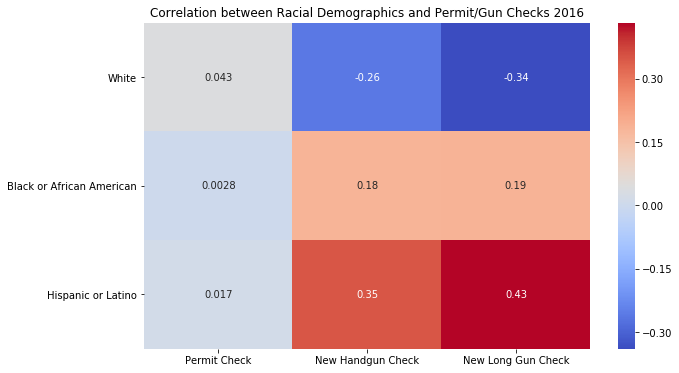

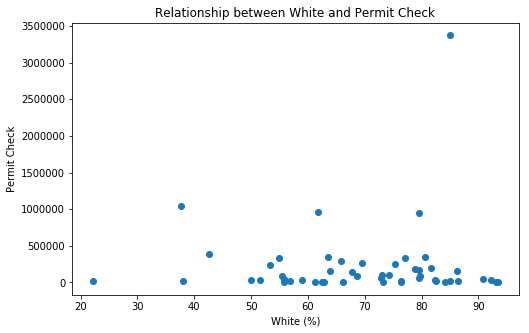

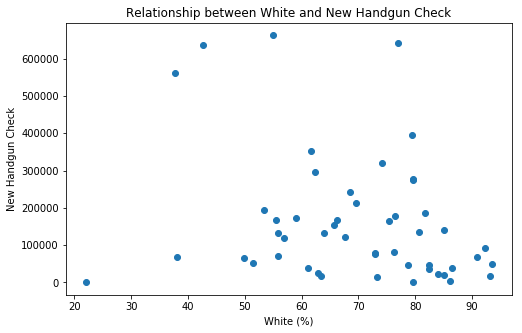

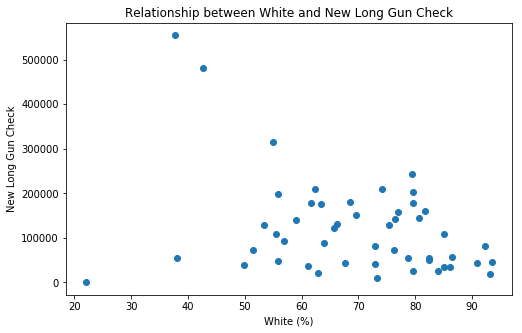

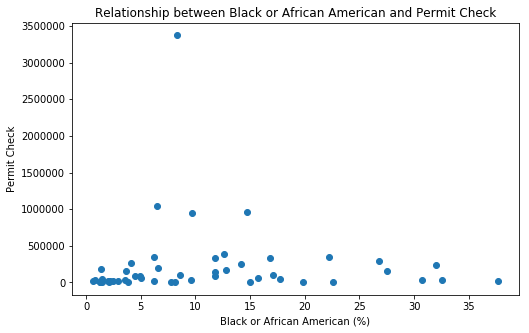

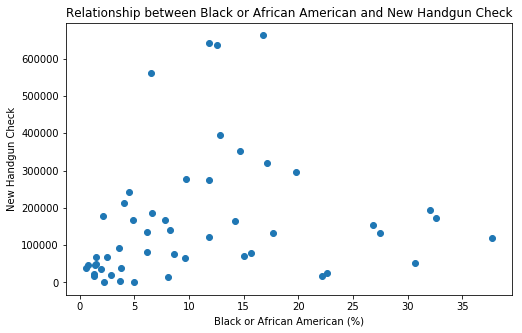

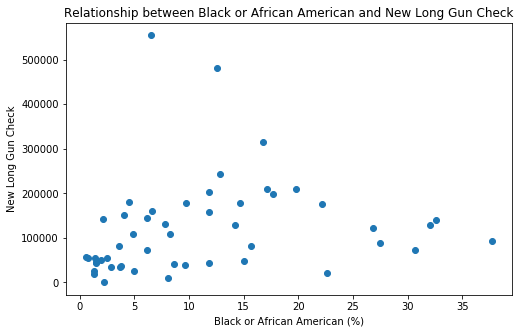

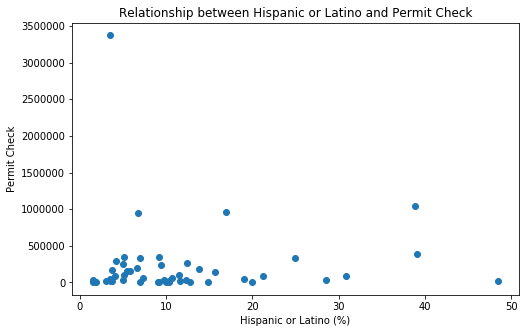

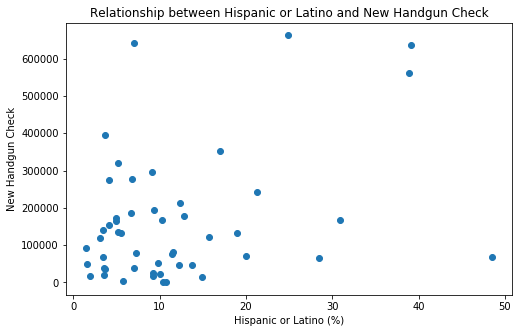

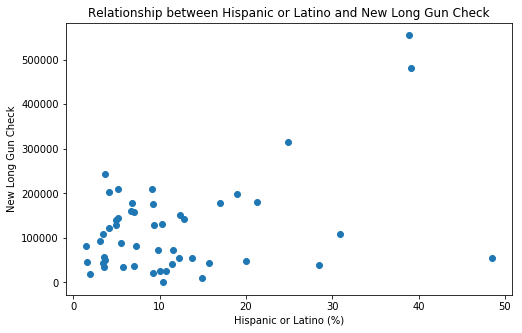

In [38]:
#visualize the correlations using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(race_gun_correlation, annot=True, cmap='coolwarm')
plt.title('Correlation between Racial Demographics and Permit/Gun Checks 2016')
plt.show()

#scatter plots for visualizing specific relationships
for race in race_columns:
    for gun_type in gun_purchase_columns:
        plt.figure(figsize=(8, 5))
        plt.scatter(data=merged_data, x=race, y=gun_type)
        plt.title(f'Relationship between {race} and {gun_type}')
        plt.xlabel(f'{race} (%)')
        plt.ylabel(f'{gun_type}')
        plt.show()

## Key Observations:
This heatmap shows the correlation between racial demographics and various categories of gun-related checks in 2016, specifically focusing on Permit Checks, New Handgun Checks, New Long Gun Checks, and Total Checks.

#### White Population:
- Permit Check Correlation: The correlation between the White population and Permit Checks is very weakly positive (0.043), suggesting a minimal relationship.
- New Handgun and Long Gun Checks: The correlation is negative for both New Handgun Checks (-0.26) and New Long Gun Checks (-0.34). This indicates that in areas with a higher percentage of White individuals, there tends to be a lower frequency of new handgun and long gun checks.

#### Black or African American Population:
- Positive Correlation: The correlations with New Handgun Checks (0.18) and New Long Gun Checks (0.19) are positive, indicating a moderate relationship where higher percentages of Black or African American individuals are associated with increased gun checks in these categories.

#### Hispanic or Latino Population:
- Strong Positive Correlation: The correlations with New Handgun Checks (0.35) and New Long Gun Checks (0.43) are the strongest observed, indicating that in areas with a higher percentage of Hispanic or Latino individuals, there is a higher frequency of gun checks in these categories.

### Overall Interpretation:
- Hispanic or Latino: This population shows the strongest positive correlations with gun checks, particularly for New Handgun and Long Gun Checks, which suggests that gun purchasing activities may be more prevalent in areas with larger Hispanic or Latino populations.
- White Population: The negative correlations for New Handgun and Long Gun Checks suggest that in areas with a higher White population, there may be a lower frequency of these gun checks.
- Black or African American: There is a moderate positive correlation with gun checks, particularly for new firearms, indicating some level of increased gun purchasing activity in these communities.

### Research Question 2  (Replace this header name!)

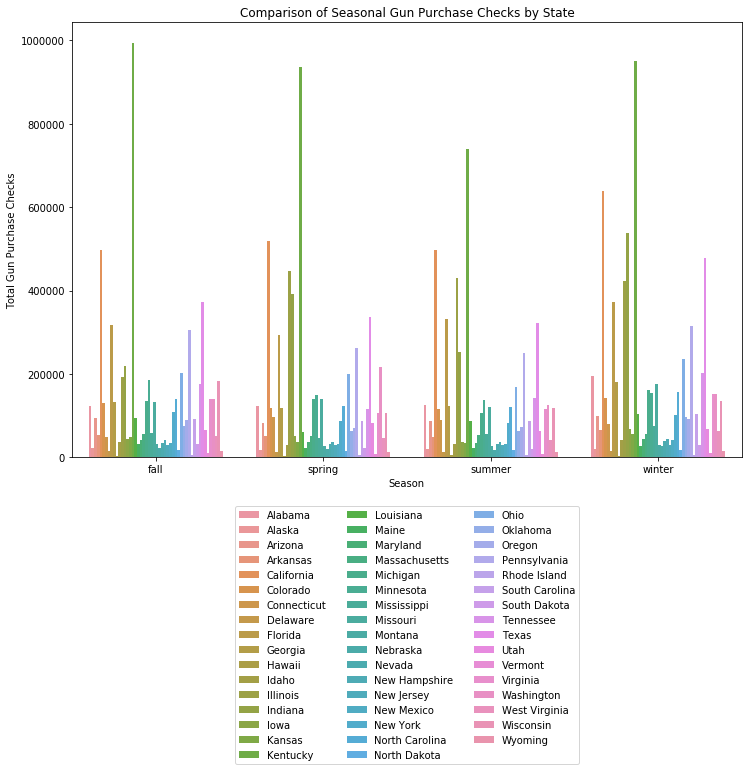

In [40]:
#---------------------------------------------------------------------
# Group by Season and State to sum the gun purchase checks for each season
seasonal_trends = df_cleaned_guns.groupby(['State', 'Season']).sum().reset_index()

# Bar plot to compare seasonal trends
plt.figure(figsize=(12, 8))
sns.barplot(data=seasonal_trends, x='Season', y='Total Checks', hue='State', ci=None)
plt.title('Comparison of Seasonal Gun Purchase Checks by State')
plt.ylabel('Total Gun Purchase Checks')
plt.xlabel('Season')

# Move the legend to the bottom
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3)

plt.show()
#---------------------------------------------------------------------

<a id='conclusions'></a>
## Conclusions

### Research Question 1:
The analysis focused on exploring the relationship between racial demographics and the frequency of various gun-related checks in 2016. Specifically, the analysis looked at correlations between different racial groups and Permit Checks, New Handgun Checks, New Long Gun Checks, and Total Checks.

#### Key Findings:
White Population:
> Permit Checks: There is a very weak positive correlation (0.043) between the White population and Permit Checks, indicating little to no relationship between the two.

>New Handgun and Long Gun Checks: The correlation is negative for both New Handgun Checks (-0.26) and New Long Gun Checks (-0.34). This suggests that in areas with a higher percentage of White individuals, there tends to be a lower frequency of new handguns and long gun checks.

Black or African American Population:
> Gun Checks: There are positive correlations between New Handgun Checks (0.18) and New Long Gun Checks (0.19). This indicates that in areas with a higher percentage of Black or African American individuals, there is a moderate increase in the frequency of these types of gun checks.

Hispanic or Latino Population:
> Strong Positive Correlation: The strongest correlations observed in this analysis are associated with the Hispanic or Latino population. Specifically, New Handgun Checks (0.35) and New Long Gun Checks (0.43) show strong positive correlations. This suggests that in areas with a higher percentage of Hispanic or Latino individuals, there is a significantly higher frequency of gun checks, particularly for new firearms. However, this suggestion is not concrete and would require further analysis to determing 
 
#### Overall Interpretation:
- Hispanic or Latino Population: This group shows the most substantial correlation with gun purchasing activities, particularly for new firearms, suggesting that gun-related activity may be more prevalent in areas with larger Hispanic or Latino populations.
- White Population: The negative correlations for New Handguns and Long Gun Checks suggest that areas with a higher White population may see a lower frequency of these gun-related activities.
- Black or African American Population: The moderate positive correlations indicate that gun purchasing activity, particularly for new firearms, is somewhat more frequent in areas with higher percentages of Black or African American individuals.

#### Recommendations for Further Research:
- Causal Factors: Further research could explore the underlying causal factors driving these correlations. Understanding why certain racial demographics are more closely associated with gun checks could provide deeper insights into social, economic, or cultural factors influencing gun ownership and purchases.
- Broader Data Analysis: Including additional variables such as income levels, education, or urban vs. rural settings could provide a more comprehensive understanding of the factors that correlate with gun checks.
- Longitudinal Studies: Examining trends over time could help identify whether these correlations are consistent or if they change based on socio-political events, economic conditions, or changes in legislation.

#### Conclusion:
The analysis reveals distinct patterns in the relationship between racial demographics and gun-related checks. While the Hispanic or Latino population shows a strong positive correlation with increased gun checks, the White population tends to show a decrease in these activities, and the Black or African American population exhibits moderate increases. Understanding these patterns is essential for policymakers, community leaders, and researchers seeking to address issues related to gun ownership and regulation. Further research is recommended to explore the deeper reasons behind these correlations and to guide informed decision-making.

### Research Question 2:

#### Key Findings:
Consistency Across Seasons:
> Gun purchase checks are generally consistent throughout the year, with no significant seasonal spikes or declines observed across most states. This suggests that seasonality does not have a strong influence on gun purchasing behavior.

High-Activity States:
> Kentucky stands out with notably higher levels of gun purchase checks in every season, indicating a consistently high demand for gun purchases throughout the year. Other states, such as Illinois, California, and Pennsylvania, also exhibit relatively high levels of activity, although not as pronounced as in Kentucky.

Lack of Pronounced Seasonal Peaks:
> The absence of sharp peaks in gun purchase activity across seasons implies that factors other than seasonality, such as state-specific legislation, cultural influences, or economic conditions, may play a more significant role in driving gun purchase checks.

State Variability:
> There is considerable variation in gun purchasing behavior across states. While some states have consistently high levels of activity, others, like Hawaii and Rhode Island, show much lower levels across all seasons. This variability could be attributed to differences in state laws, population size, or local gun ownership culture.

#### Recommendations for Further Research:
- Focus on High-Activity States: Further investigation into why states like Kentucky have such high levels of gun purchase checks year-round could provide valuable insights.
- Explore Non-Seasonal Factors: Since seasonality is not a strong driver, research could explore other factors such as state laws, economic conditions, and cultural attitudes towards gun ownership.
- Longitudinal Analysis: Expanding the analysis to include multiple years could help determine whether these patterns are consistent over time or if they were specific to 2016.

#### Conclusion:
The analysis indicates that gun purchase checks are relatively stable throughout the year, with no strong seasonal trends. States like Kentucky exhibit consistently high levels of activity, warranting further investigation into the factors driving this demand. The variability in gun purchase checks across states suggests that local factors may significantly influence gun purchasing behavior.


### Limitation
> It's important to note that this analysis has certain limitations. Specifically, the focus is solely on permit checks and checks related to new gun purchases. This means that other types of checks, such as prepawned checks, rental checks, and private sale checks, were not included in the analysis. Without considering these additional data points, the exploration of the relationship between race and gun check frequency is not fully comprehensive. Therefore, the conclusions drawn may not reflect the entire spectrum of gun-related activities, and further analysis incorporating these additional types of checks would be necessary to provide a more complete understanding of the relationship. All findings are tenative due to this.

In [42]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0